<a href="https://colab.research.google.com/github/fahriyegrl/bitcoin_predict_time_series_tensorflow/blob/main/bitcoin_prediction_time_series_forecasting_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting and downloading then Bitcoin historical data from here: https://coincodex.com/crypto/bitcoin/historical-data/

In [1]:
!wget https://github.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/raw/main/bitcoin_2019-08-26_2024-08-24.csv

--2024-08-31 02:49:40--  https://github.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/raw/main/bitcoin_2019-08-26_2024-08-24.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/main/bitcoin_2019-08-26_2024-08-24.csv [following]
--2024-08-31 02:49:40--  https://raw.githubusercontent.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/main/bitcoin_2019-08-26_2024-08-24.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204004 (199K) [text/plain]
Saving to: ‘bitcoin_2019-08-26_2024-08-24.csv’

bitcoin_2019-08-26_ 100%[===================>

In [2]:
import pandas as pd

df = pd.read_csv('bitcoin_2019-08-26_2024-08-24.csv')
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-08-23,2024-08-24,60392.09,64851.37,60392.09,63979.97,1.096811e+11,1.218889e+12
1,2024-08-22,2024-08-23,61167.48,61379.44,59953.14,60386.02,1.099257e+11,1.197426e+12
2,2024-08-21,2024-08-22,59114.41,61813.19,58907.09,61109.99,1.094567e+11,1.180932e+12
3,2024-08-20,2024-08-21,59448.00,61315.96,58705.68,59056.01,1.036199e+11,1.185949e+12
4,2024-08-19,2024-08-20,58320.02,59562.71,57928.86,59562.71,9.317886e+10,1.157509e+12


In [3]:
df.tail()

,Start,End,Open,High,Low,Close,Volume,Market Cap
1820,2019-08-30,2019-08-31,9499.878802,9640.946925,9409.399994,9582.255358,1.614085e+10,1.709868e+11
1821,2019-08-29,2019-08-30,9755.839220,9755.839220,9388.612159,9493.755389,2.061784e+10,1.707816e+11
1822,2019-08-28,2019-08-29,10206.418980,10270.522245,9691.877126,9759.791528,1.522129e+10,1.803473e+11
1823,2019-08-27,2019-08-28,10380.720317,10380.720317,10090.229211,10219.413373,1.570331e+10,1.826662e+11
1824,2019-08-26,2019-08-27,10150.617721,10556.072516,10150.617721,10374.876617,1.716487e+10,1.852813e+11


In [4]:
df = pd.read_csv('bitcoin_2019-08-26_2024-08-24.csv',
                 parse_dates=['Start'],
                 index_col= ['Start'])
df.head()

,End,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,,
2024-08-23,2024-08-24,60392.09,64851.37,60392.09,63979.97,1.096811e+11,1.218889e+12
2024-08-22,2024-08-23,61167.48,61379.44,59953.14,60386.02,1.099257e+11,1.197426e+12
2024-08-21,2024-08-22,59114.41,61813.19,58907.09,61109.99,1.094567e+11,1.180932e+12
2024-08-20,2024-08-21,59448.00,61315.96,58705.68,59056.01,1.036199e+11,1.185949e+12
2024-08-19,2024-08-20,58320.02,59562.71,57928.86,59562.71,9.317886e+10,1.157509e+12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2024-08-23 to 2019-08-26
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   End         1825 non-null   object 
 1   Open        1825 non-null   float64
 2   High        1825 non-null   float64
 3   Low         1825 non-null   float64
 4   Close       1825 non-null   float64
 5   Volume      1825 non-null   float64
 6   Market Cap  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 114.1+ KB


In [6]:
len(df)

1825

In [7]:
bitcoin_price_reversed = df.iloc[::-1]
bitcoin_price = pd.DataFrame(bitcoin_price_reversed['Close']).rename(columns={'Close':'price'})
bitcoin_price.head()

,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528
2019-08-29,9493.755389
2019-08-30,9582.255358


In [8]:
bitcoin_price.index.dtype

dtype('<M8[ns]')

In [9]:
len(bitcoin_price), bitcoin_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2019-08-26 to 2024-08-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1825 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


(1825, None)

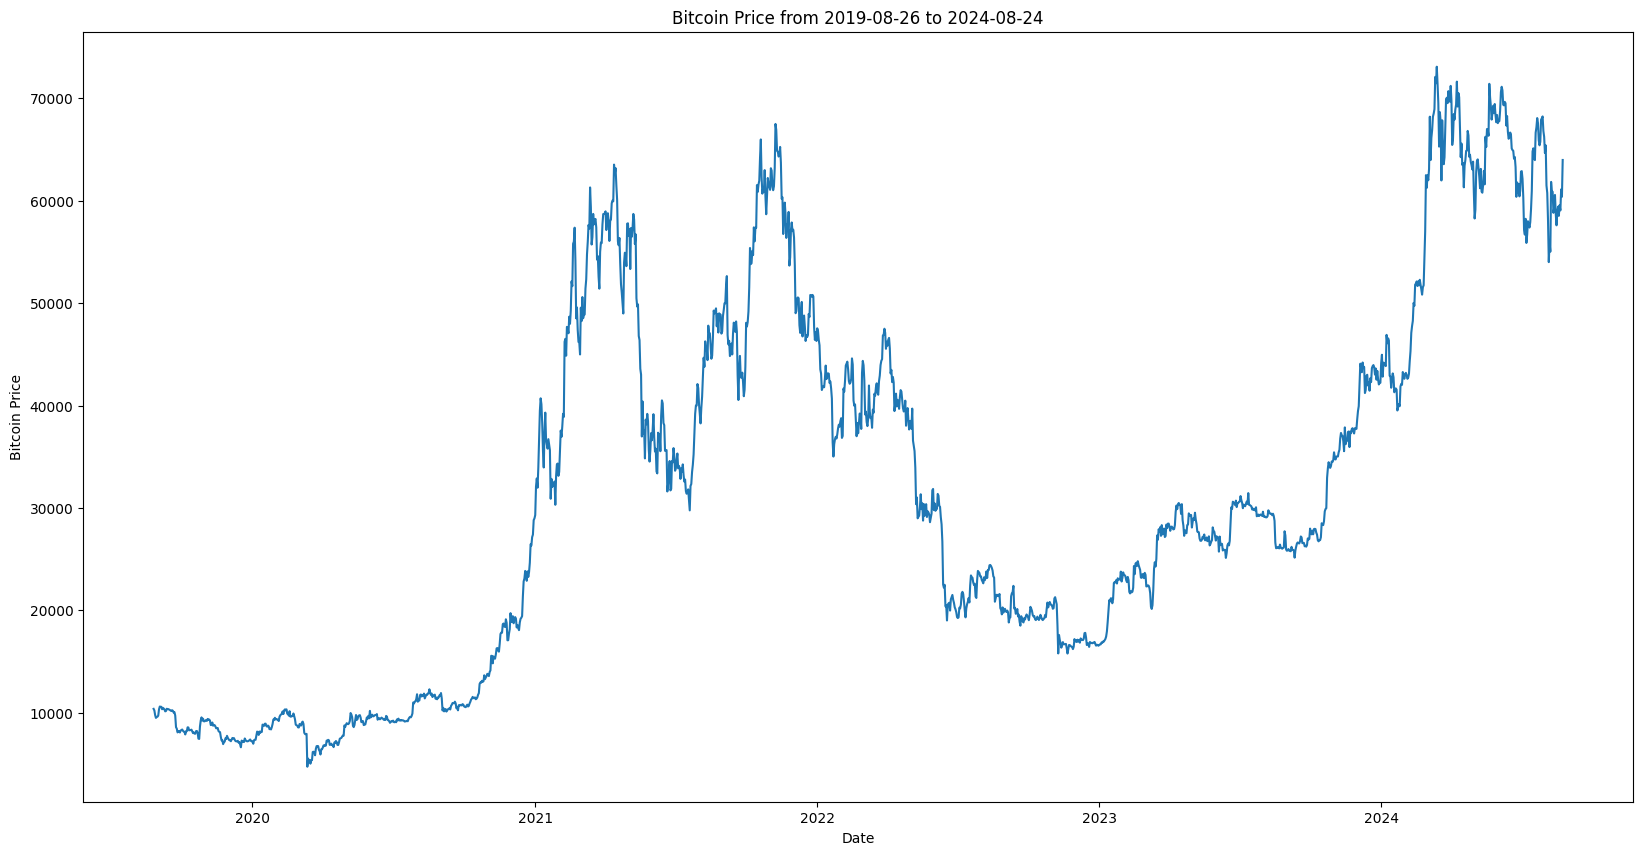

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(bitcoin_price)
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price from 2019-08-26 to 2024-08-24")
plt.xlabel("Date")

plt.show()

In [11]:
bitcoin_price[:5]

,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528
2019-08-29,9493.755389
2019-08-30,9582.255358


In [12]:
timesteps = bitcoin_price.index.to_numpy()
prices = bitcoin_price['price'].to_numpy()

timesteps[:5], prices[:5]

(array(['2019-08-26T00:00:00.000000000', '2019-08-27T00:00:00.000000000',
        '2019-08-28T00:00:00.000000000', '2019-08-29T00:00:00.000000000',
        '2019-08-30T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
         9582.25535778]))

In [13]:
split = int(len(prices)  * 0.8)
split

1460

In [14]:
from os import X_OK
## Creating train and test datasets

# split = int(len(bitcoin_price)  * 0.8)
# split

X_train, y_train = timesteps[:split], prices[:split]
X_test, y_test = timesteps[split:], prices[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(1460, 1460, 365, 365)

In [15]:
X_test.shape

(365,)

In [16]:
timesteps[:1]

array(['2019-08-26T00:00:00.000000000'], dtype='datetime64[ns]')

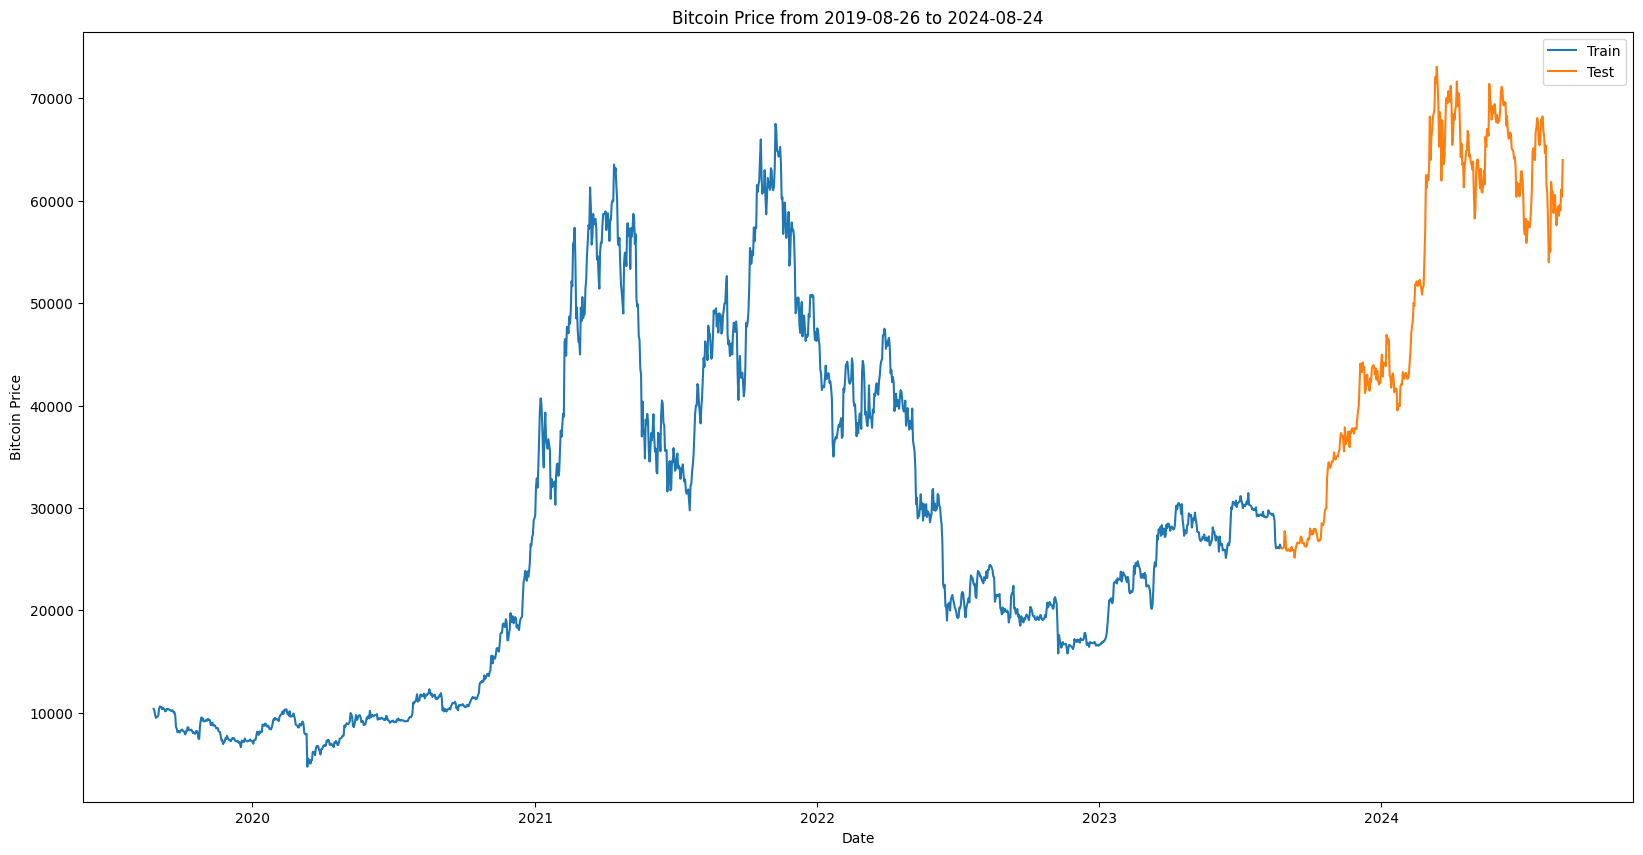

In [17]:
plt.figure(figsize=(20,10))
plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.legend(['Train', 'Test'])
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price from 2019-08-26 to 2024-08-24")
plt.xlabel("Date")

plt.show()

In [18]:
## plot time series function to use later

def plot_time_series(timesteps, values, start=0, end=None, label=None ):

  plt.plot(timesteps[start:end], values[start:end])
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend([label])
  plt.grid(True)

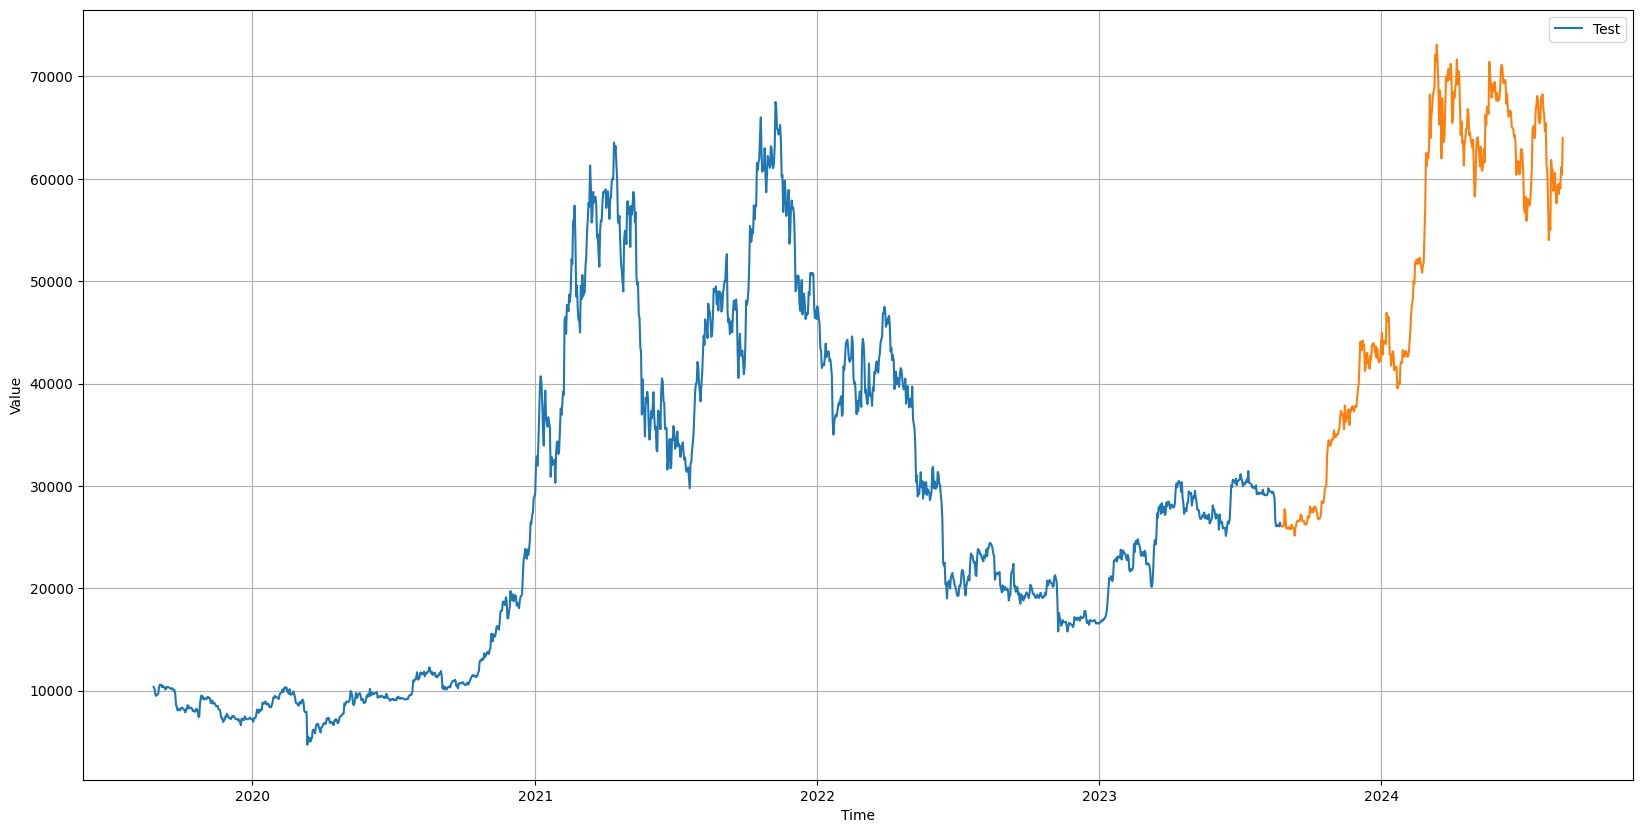

In [19]:
plt.figure(figsize=(20,10))
plot_time_series(timesteps=X_train, values = y_train, label='Train')
plot_time_series(timesteps=X_test, values = y_test, label='Test')

In [20]:
## Model 1: In this model, the prediction at time will be the value at time-1.

#

base_forecast = y_test[:-1]
base_forecast[:10]

array([26058.22, 26021.02, 26088.38, 26127.89, 27718.23, 27316.23,
       25936.45, 25816.57, 25856.93, 25980.6 ])

In [21]:
y_test[:10]

array([26058.22, 26021.02, 26088.38, 26127.89, 27718.23, 27316.23,
       25936.45, 25816.57, 25856.93, 25980.6 ])

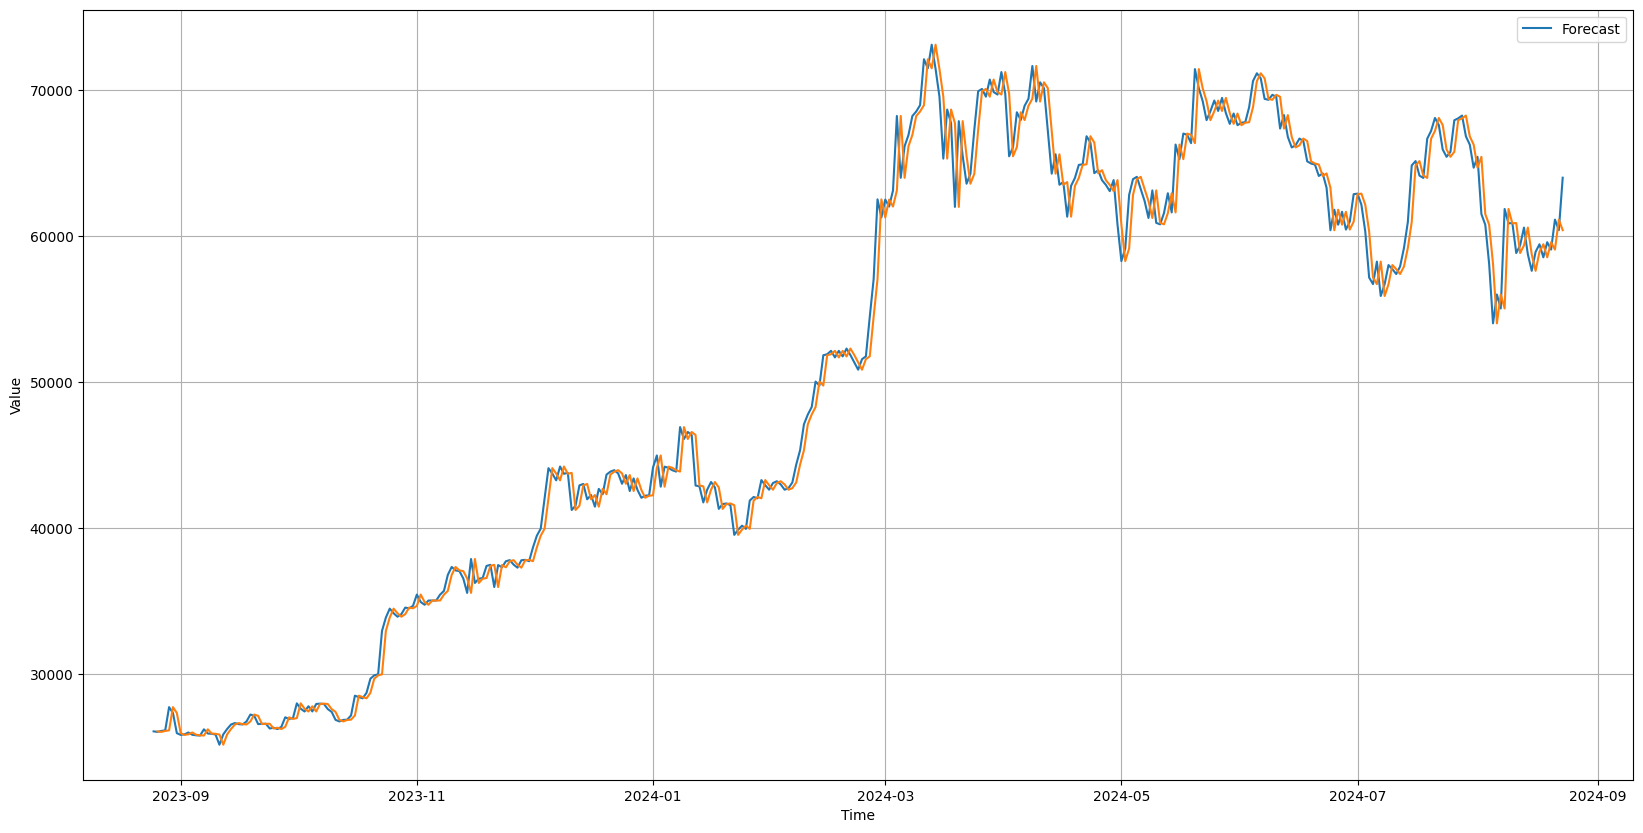

In [22]:
plt.figure(figsize=(20,10))
plot_time_series(timesteps=X_test, values = y_test, label='Test')
plot_time_series(timesteps=X_test[1:], values = base_forecast, label='Forecast')

In [23]:
import tensorflow as tf


#Regression metrics (which can also be used for time series forecasting):  lower is better.

# MAE - mean absolute error
# MSE - mean squared error
# RMSE - root mean square error
# MAPE/sMAPE - (symmetric) mean absolute percentage error


def evaluation(y_true, y_pred):

  mae_metric = tf.keras.metrics.MeanAbsoluteError()
  mae= mae_metric(y_true, y_pred)

  mse_metric = tf.keras.metrics.MeanSquaredError()
  mse = mse_metric(y_true, y_pred)

  rmse = tf.sqrt(mse)


  mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()
  mape = mape_metric(y_true, y_pred)


  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "mape": mape.numpy()}


In [24]:
_base_forecast_evaluation = evaluation(y_test[1:], base_forecast)
_base_forecast_evaluation

{'mae': 996.01025, 'mse': 2205020.5, 'mape': 1.8600316}

In [25]:
## Updating the datasets to WINDOW and HORIZON

HORIZON = 1 # to predict one/next day
WINDOW = 7 # use the past seven days to predict Horizon


 ## Just trial on small data
def get_label_window(x, horizon=HORIZON):

  return x[:, :-horizon], x[:, -horizon:]

In [26]:
tf.range(8)

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)>

In [27]:
fake_window, fake_label =  get_label_window(tf.expand_dims(tf.range(8), axis=0))
tf.squeeze(fake_window).numpy, tf.squeeze(fake_label).numpy

(<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(7,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6], dtype=int32)>>,
 <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int32, numpy=7>>)

In [28]:
import numpy as np

window_size = 7
horizon = 1

window_step = window_size + horizon

np.arange(window_size + horizon)

window_step = np.expand_dims(np.arange(window_size + horizon),axis=0)  ## 2D
window_step

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [29]:
prices[:10], len(prices)

(array([10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
         9582.25535778,  9609.78764737,  9716.72190969, 10329.85905157,
        10603.09546299, 10578.32020957]),
 1825)

In [30]:
window_index = window_step + np.expand_dims(np.arange(len(prices[:14]) - (window_size + horizon) - 1), axis=0).T

window_index

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11]])

In [31]:
windows = prices[:14][window_index]
windows

array([[10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
         9582.25535778,  9609.78764737,  9716.72190969, 10329.85905157],
       [10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
         9609.78764737,  9716.72190969, 10329.85905157, 10603.09546299],
       [ 9759.79152841,  9493.75538921,  9582.25535778,  9609.78764737,
         9716.72190969, 10329.85905157, 10603.09546299, 10578.32020957],
       [ 9493.75538921,  9582.25535778,  9609.78764737,  9716.72190969,
        10329.85905157, 10603.09546299, 10578.32020957, 10574.499542  ],
       [ 9582.25535778,  9609.78764737,  9716.72190969, 10329.85905157,
        10603.09546299, 10578.32020957, 10574.499542  , 10339.45563157]])

In [32]:
## Bitcoinn prices = turn them to (Window, Horizon) 2D array

def make_windows(x, window_size= WINDOW, horizon=HORIZON):

  window_step = np.expand_dims(np.arange(window_size + horizon),axis=0)

  window_index = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T

  windows = x[window_index]

  window, label = get_label_window(windows, horizon= horizon)

  return window, label

In [33]:
len(prices)

1825

In [34]:
all_windows, all_labels = make_windows(prices,window_size=window_size,horizon=horizon )

len(all_windows), len(all_labels)

(1818, 1818)

In [35]:
all_windows[1].shape, all_labels[1].shape

((7,), (1,))

In [36]:
for i in range(5):
  print(all_windows[i], all_labels[i])

[10374.87661724 10219.41337325  9759.79152841  9493.75538921
  9582.25535778  9609.78764737  9716.72190969] [10329.85905157]
[10219.41337325  9759.79152841  9493.75538921  9582.25535778
  9609.78764737  9716.72190969 10329.85905157] [10603.09546299]
[ 9759.79152841  9493.75538921  9582.25535778  9609.78764737
  9716.72190969 10329.85905157 10603.09546299] [10578.32020957]
[ 9493.75538921  9582.25535778  9609.78764737  9716.72190969
 10329.85905157 10603.09546299 10578.32020957] [10574.499542]
[ 9582.25535778  9609.78764737  9716.72190969 10329.85905157
 10603.09546299 10578.32020957 10574.499542  ] [10339.45563157]


In [37]:
### Getiing Test and Train Data

split = int(len(prices)  * 0.8)


X_train, y_train = all_windows[:split], all_labels[:split]
X_test, y_test = all_windows[split:], all_labels[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(1460, 1460, 358, 358)

In [38]:
split

1460

In [39]:
len(all_windows), len(all_labels)


(1818, 1818)

In [40]:
X_train[:3], y_train[:3]

(array([[10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
          9582.25535778,  9609.78764737,  9716.72190969],
        [10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
          9609.78764737,  9716.72190969, 10329.85905157],
        [ 9759.79152841,  9493.75538921,  9582.25535778,  9609.78764737,
          9716.72190969, 10329.85905157, 10603.09546299]]),
 array([[10329.85905157],
        [10603.09546299],
        [10578.32020957]]))

In [41]:
X_test[:3], y_test[:3]

(array([[26058.22, 26021.02, 26088.38, 26127.89, 27718.23, 27316.23,
         25936.45],
        [26021.02, 26088.38, 26127.89, 27718.23, 27316.23, 25936.45,
         25816.57],
        [26088.38, 26127.89, 27718.23, 27316.23, 25936.45, 25816.57,
         25856.93]]),
 array([[25816.57],
        [25856.93],
        [25980.6 ]]))

In [42]:
## Create a checkpoint callback

import os

def checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name + ".keras"),
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

In [43]:
## Model 2: with single dense layer (window=7, horizon=1), Adam opt, MAE loss function
from tensorflow.keras import layers
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(units=128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_2")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2.fit(x=X_train,
            y=y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[checkpoint(model_name="model_2.name")])


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 20397.7207 - mae: 20397.7207 - mse: 580423424.0000 - val_loss: 13925.0098 - val_mae: 13925.0098 - val_mse: 214129792.0000
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4233.5361 - mae: 4233.5361 - mse: 32432722.0000 - val_loss: 6851.7568 - val_mae: 6851.7568 - val_mse: 59383128.0000
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2647.4153 - mae: 2647.4153 - mse: 13411917.0000 - val_loss: 3991.8428 - val_mae: 3991.8428 - val_mse: 21908076.0000
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1768.5714 - mae: 1768.5714 - mse: 6640560.0000 - val_loss: 2086.4854 - val_mae: 2086.4854 - val_mse: 8058999.5000
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1340.6381 - mae: 1340.6381 - mse: 4336498.0000 - val_loss: 1810.4756 - val_mae: 1810.4756 - val_mse: 6295164.5000
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1250.3501 - mae: 1250.3501 - mse: 3913863.5000 - val_loss: 176

In [44]:
model_2.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 856.8066 - mae: 856.8066 - mse: 1673519.8750


[1127.074462890625, 1127.074462890625, 2600144.0]

In [45]:
## Loading the best model

model_2 = tf.keras.models.load_model("model_experiments/model_2.name.keras")
model_2.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 842.3642 - mae: 842.3642 - mse: 1645131.7500


[1115.61572265625, 1115.61572265625, 2568586.0]

In [46]:
## Make a prediction

forecast = model_2.predict(X_test)
forecast.shape

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


(358, 1)

In [47]:
forecast[:10]

array([[26316.738],
       [25487.648],
       [25576.268],
       [25730.424],
       [25562.537],
       [25540.36 ],
       [25546.27 ],
       [25858.398],
       [25819.59 ],
       [25706.79 ]], dtype=float32)

In [48]:
X_test.shape

(358, 7)

In [49]:
tf.squeeze(X_test).shape

TensorShape([358, 7])

In [50]:
model_2_evaluation = evaluation(y_test, forecast)
model_2_evaluation

{'mae': 1115.6156, 'mse': 2568586.2, 'mape': 2.1044931}

In [51]:
_base_forecast_evaluation

{'mae': 996.01025, 'mse': 2205020.5, 'mape': 1.8600316}

In [52]:
timesteps[:1]

array(['2019-08-26T00:00:00.000000000'], dtype='datetime64[ns]')

In [53]:
len(timesteps[1:])

1824

In [54]:
len(X_test), len(X_train), len(y_test), len(timesteps)

(358, 1460, 358, 1825)

In [55]:
X_test.shape

(358, 7)

In [56]:
timesteps.shape, bitcoin_price.shape

((1825,), (1825, 1))

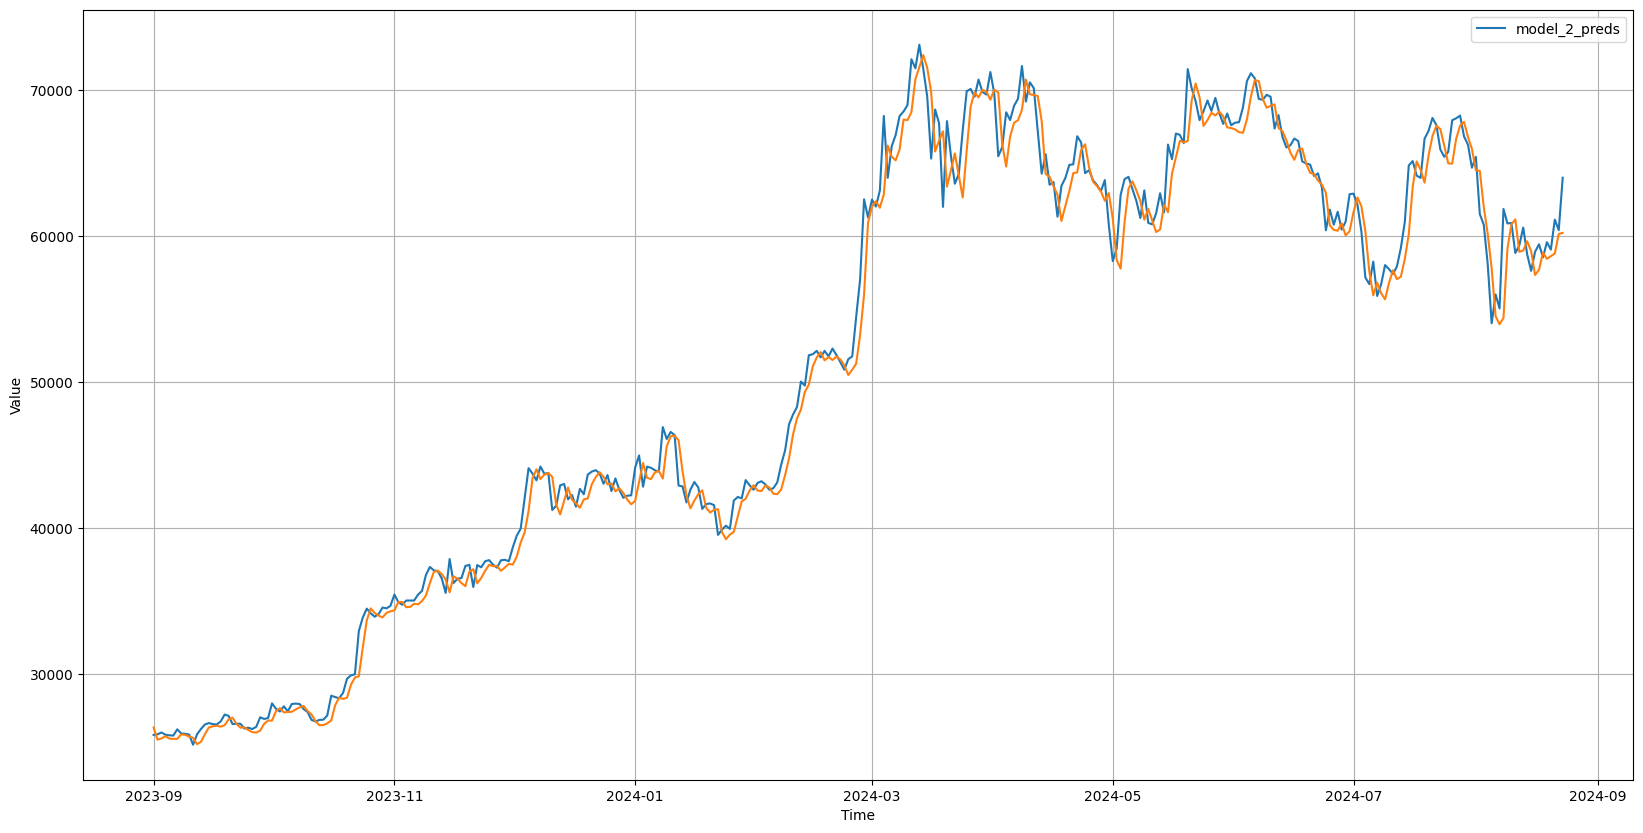

In [57]:
## Ploting the model_2 prediction

plt.figure(figsize=(20,10))
plot_time_series(timesteps= timesteps[1467:], values= bitcoin_price[1467:] ,label="Test")

plot_time_series(timesteps= timesteps[1467:],
                values= forecast,
                label="model_2_preds")

## Model 3:  Same model as Model 2 but 30 days window size and 1 day horizo


In [58]:
HORIZON = 1
WINDOW = 30

all_window, all_label = make_windows(prices, window_size=WINDOW, horizon=HORIZON)

len(all_window), len(all_label), len(prices)

(1795, 1795, 1825)

In [59]:
split, all_window[1].shape, all_label[1].shape

(1460, (30,), (1,))

In [60]:
## Train and test data

train_window , test_window, train_label, test_label = all_windows[:split], all_windows[split:], all_labels[:split], all_labels[split:]

len(train_window), len(test_window), len(train_label), len(test_label)

(1460, 358, 1460, 358)

In [61]:
train_window[:3], train_label[:3]

(array([[10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
          9582.25535778,  9609.78764737,  9716.72190969],
        [10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
          9609.78764737,  9716.72190969, 10329.85905157],
        [ 9759.79152841,  9493.75538921,  9582.25535778,  9609.78764737,
          9716.72190969, 10329.85905157, 10603.09546299]]),
 array([[10329.85905157],
        [10603.09546299],
        [10578.32020957]]))

In [62]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(units=128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3")

model_3.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_3.fit(x=train_window, y=train_label,
            epochs=100,
            batch_size=32,
            verbose=0,
            validation_data=(test_window, test_label),
            callbacks=[checkpoint(model_name="model_3.name")])

In [63]:
model_3.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 718.9561 - mae: 718.9561 - mse: 1349251.8750


[991.7002563476562, 991.7002563476562, 2184285.25]

In [64]:
model_3= tf.keras.models.load_model("model_experiments/model_3.name.keras")
model_3.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 719.0271 - mae: 719.0271 - mse: 1350394.7500


[991.6473388671875, 991.6473388671875, 2185805.0]

In [65]:
model_3_forecast = model_3.predict(test_window)
model_3_forecast.shape, tf.squeeze(test_window).shape


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


((358, 1), TensorShape([358, 7]))

In [66]:
model_3_evaluation = evaluation(test_label, model_3_forecast)
model_3_evaluation

{'mae': 991.64734, 'mse': 2185805.2, 'mape': 1.839907}

In [67]:
model_2_evaluation

{'mae': 1115.6156, 'mse': 2568586.2, 'mape': 2.1044931}

In [68]:
timesteps.shape, bitcoin_price.shape

((1825,), (1825, 1))

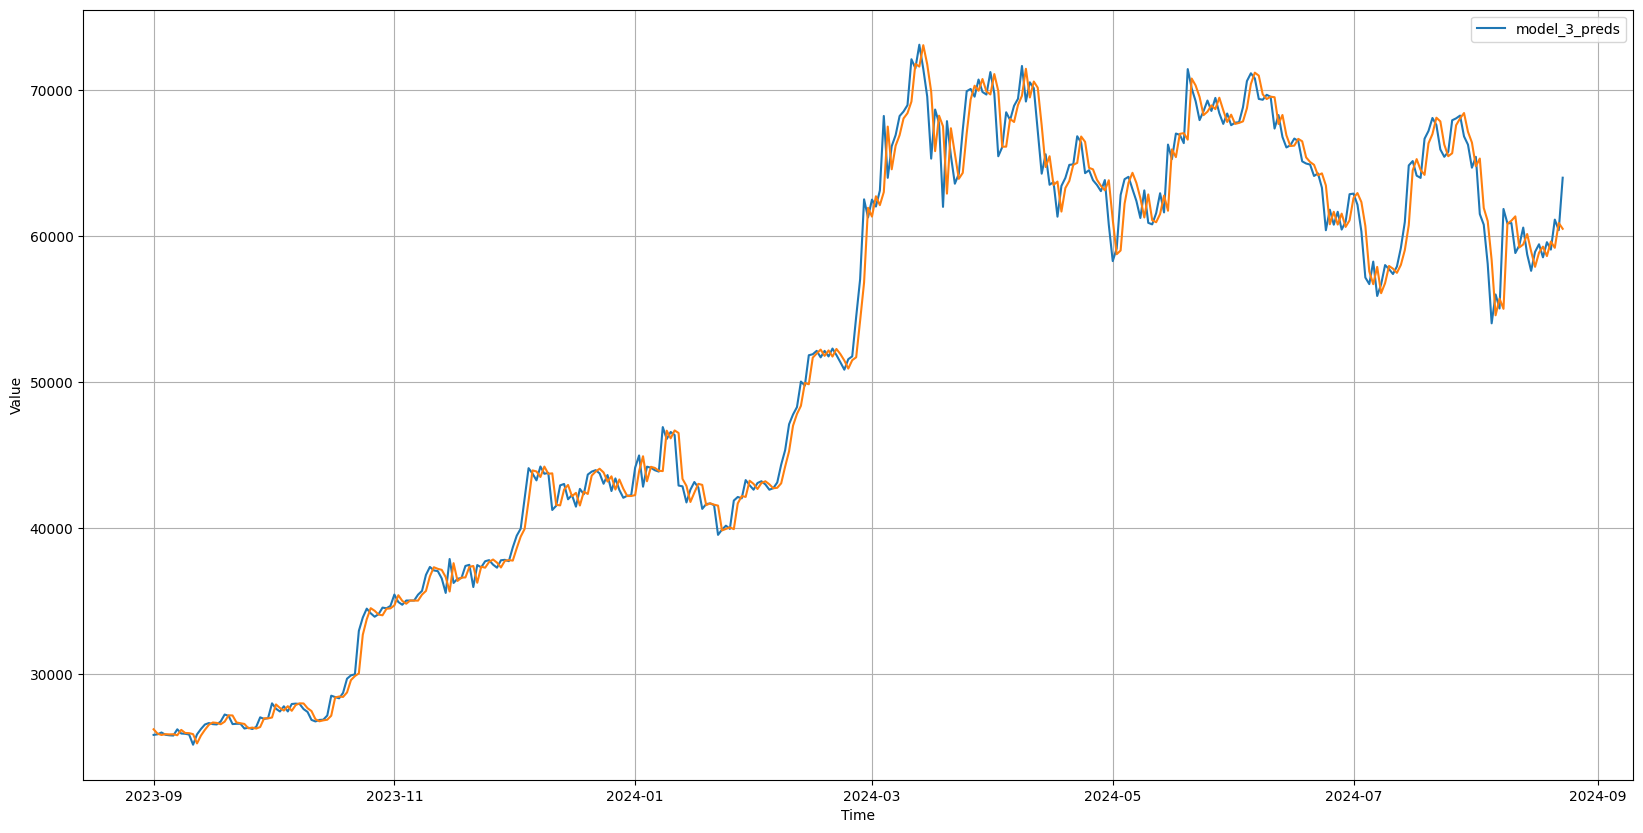

In [69]:
## Ploting the model_3 prediction

plt.figure(figsize=(20,10))
plot_time_series(timesteps= timesteps[1467:], values= bitcoin_price[1467:] ,label="Test")

plot_time_series(timesteps= timesteps[1467:],
                values= model_3_forecast,
                label="model_3_preds")

## Model 4: Window=30 and horizon=7

In [70]:
prices[:3], prices[-3:]

(array([10374.87661724, 10219.41337325,  9759.79152841]),
 array([61109.99, 60386.02, 63979.97]))

In [71]:
bitcoin_price[:3]

,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528


In [72]:
HORIZON = 7
WINDOW = 30

In [73]:
import numpy as np

def make_windows(x, window_size=WINDOW, horizon=HORIZON):


  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)


  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  windowed_array = x[window_indexes]

  windows, labels = get_label_window(windowed_array, horizon=horizon)
  return windows, labels

In [74]:
HORIZON = 7
WINDOW = 30

all_window, all_label = make_windows(prices, window_size=30, horizon=7)

len(all_window), len(all_label), len(prices)

(1789, 1789, 1825)

In [75]:
all_window[1], all_label[1]

(array([10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
         9609.78764737,  9716.72190969, 10329.85905157, 10603.09546299,
        10578.32020957, 10574.499542  , 10339.45563157, 10477.09483846,
        10410.18764404, 10322.05760789, 10132.54480456, 10159.72047332,
        10387.51484121, 10346.59919496, 10353.54979822, 10313.44352598,
        10268.65798496, 10208.16581794, 10164.10190487, 10241.60879539,
        10179.86223084, 10006.06533083, 10050.18754113,  9719.39701861,
         8588.42490586,  8439.8461899 ]),
 array([8077.93635444, 8183.56987236, 8208.59598768, 8068.66873829,
        8269.02868158, 8294.74359665, 8361.91923314]))

In [76]:
all_label[1], all_label[1].shape, all_window[1].shape

(array([8077.93635444, 8183.56987236, 8208.59598768, 8068.66873829,
        8269.02868158, 8294.74359665, 8361.91923314]),
 (7,),
 (30,))

In [77]:
train_window , test_window, train_label, test_label = all_windows[split:], all_windows[:split], all_labels[split:], all_labels[:split]

len(train_window), len(test_window), len(train_label), len(test_label)

(358, 1460, 358, 1460)

In [78]:
train_window.shape, train_label.shape, test_window.shape, test_label.shape

((358, 7), (358, 1), (1460, 7), (1460, 1))

In [79]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Dense(units=128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_4")

model_4.compile(loss="MAE",
                optimizer = tf.keras.optimizers.Adam())

model_4.fit(train_window,
            train_label,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_window, test_label),
            callbacks=[checkpoint(model_name="model_4.name")])



In [80]:
model_4.evaluate(test_window, test_label)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 852.5576


1096.897216796875

In [81]:
model_4 = tf.keras.models.load_model("model_experiments/model_4.name.keras")
model_4.evaluate(test_window, test_label)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 852.5576


1096.897216796875

In [82]:
model_4.predict(test_window)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[ 9834.952, 10085.266,  9833.502, ...,  9973.291,  9715.933,
         9869.171],
       [ 9899.166, 10055.734, 10040.529, ...,  9997.321,  9868.047,
         9979.143],
       [10037.867,  9942.727, 10152.191, ..., 10075.149, 10075.015,
        10108.558],
       ...,
       [26209.49 , 26364.172, 26185.613, ..., 26260.648, 26247.584,
        26287.99 ],
       [26538.486, 26758.477, 26872.275, ..., 26660.031, 26729.182,
        26712.459],
       [26829.574, 26591.812, 26858.365, ..., 26888.254, 26829.025,
        26947.379]], dtype=float32)

In [83]:
model_4_forecast = model_4.predict(test_window)
model_4_forecast.shape, tf.squeeze(test_window).shape

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


((1460, 7), TensorShape([1460, 7]))

In [84]:
model_4_evaluation = evaluation(test_label, model_4_forecast)
model_4_evaluation

{'mae': 1096.8972, 'mse': 3110188.5, 'mape': 3.94724}

In [85]:
model_3_evaluation, model_2_evaluation

({'mae': 991.64734, 'mse': 2185805.2, 'mape': 1.839907},
 {'mae': 1115.6156, 'mse': 2568586.2, 'mape': 2.1044931})

##  Model 5 : Conv1
Conv1 models can be used seq2seq problems.
WINDOW = 7 and HORIZON=1 many to one problem.

In [152]:
HORIZON = 1
WINDOW = 7

In [153]:
all_window, all_label = make_windows(prices, window_size=WINDOW,horizon=HORIZON )
len(all_window), len(all_label), all_window[1].shape, all_label[1].shape

(1818, 1818, (7,), (1,))

In [154]:
split = int(len(prices)  * 0.8)
split


1460

In [155]:
train_window, test_window, train_label, test_label = all_windows[:split], all_windows[split:], all_labels[:split], all_labels[split:]

len(train_window), len(test_window), len(train_label), len(test_label)

(1460, 358, 1460, 358)

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

the input shape is (batch_shape, steps, channels)
steps is here WINDOW size also features
channels is here horizon

An example:
# The inputs are 128-length vectors with 10 timesteps, and the
# batch size is 4.
x = np.random.rand(4, 10, 128)
y = keras.layers.Conv1D(32, 3, activation='relu')(x)
print(y.shape)


In [156]:
x = tf.constant(train_window[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
        9582.25535778,  9609.78764737,  9716.72190969])>

In [157]:
expands_dim_x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
expands_dim_x(x)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[10374.877],
       [10219.413],
       [ 9759.792],
       [ 9493.756],
       [ 9582.255],
       [ 9609.788],
       [ 9716.722]], dtype=float32)>

In [158]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, padding='causal',  activation="relu"),
  layers.Dense(HORIZON)
], name= "model_5")

model_5.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_window,
          train_label,
          batch_size=128,
          epochs=100,
          verbose=1,
          validation_data=(test_window, test_label),
          callbacks=[checkpoint(model_name="model_5.name")])



Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 18368.4707 - val_loss: 14109.5557
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4352.5127 - val_loss: 6133.1182
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2438.3823 - val_loss: 3257.7649
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1503.0278 - val_loss: 1843.6815
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1180.4553 - val_loss: 1627.2804
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1148.8425 - val_loss: 1706.4749
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1122.7518 - val_loss: 1612.8340
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1099.9545 - val_loss: 1587.1573
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1094.9720 - val_loss: 1579.2500
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1091.4714 - val_loss: 1574.1501
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1082.7308 - val_loss: 1560

In [159]:
model_5.summary()

Model: "model_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_17 (Lambda)                   │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [160]:
model_5.evaluate(test_window, test_label)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 792.4714


1063.1898193359375

In [163]:
model_5_preds = model_5.predict(test_window)
model_5_preds[0]

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[26360.658]], dtype=float32)

In [165]:
model_5_evaluation = evaluation(test_label, model_5_preds)
model_5_evaluation

{'mae': 1063.1898, 'mse': 2423216.0, 'mape': 1.9956547}

In [168]:
model_2_evaluation, model_3_evaluation, model_4_evaluation

({'mae': 1115.6156, 'mse': 2568586.2, 'mape': 2.1044931},
 {'mae': 991.64734, 'mse': 2185805.2, 'mape': 1.839907},
 {'mae': 1096.8972, 'mse': 3110188.5, 'mape': 3.94724})

## Model 6: RNN (LTSM)